In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date
import calendar
import math

In [2]:
"""приведение DF к нормальному виду(считывание, удаление None значений, добавление отклонений от среднего и медианы)"""
def datasetNormalise()->DataFrame:
    df = pd.read_csv(r'C:\Users\dimak\AP-labs/lab1/dataset.csv', sep=',')
    df = df.dropna()
    #df = df.query('Date >= "1998-01-01"')
    df_mean = df["Value"].mean()
    df_median = df["Value"].median()
    df["Mean"] = df.apply(lambda x: (abs(x["Value"] - df_mean)), axis=1)
    df["Median"] = df.apply(lambda x: (abs(x["Value"] - df_median)), axis=1)
    df = df.sort_values(by="Date", ascending=True)
    return df

In [3]:
"""нахождение значений с отлонением от медианы >= заданного значения value"""
def findValueByMean(df:DataFrame, value:float)->DataFrame:
    return df.query('Mean >= @value')

In [4]:
"""нахождение значений во временном отрезке"""
def findValueInTimedelta(df:DataFrame, first_date:date, last_date:date)->DataFrame:
    return df.query('Date >= @first_date and Date <= @last_date')

In [5]:
"""построение графиков значений в определенном месяце, среднего значения и медианы"""
def makePlotMonth(df:DataFrame, year:int, month:int):
    fig = plt.figure(figsize=(10, 5))
    plt.ylabel('Значение')
    plt.xlabel('Дата')
    plt.title('Курс Доллара')
    _, last_day = calendar.monthrange(year, month)
    first = str(date(year, month, 1))
    last = str(date(year, month, last_day))
    new_df = findValueInTimedelta(df, first, last)
    x = new_df["Date"]
    y = new_df["Value"]
    y1 = new_df["Value"].mean()
    y2 = new_df["Value"].median()
    plt.scatter(x, y, color='black', linestyle='-', linewidths=1)
    plt.axhline (y=y1, color='red', linestyle='--', label='Среднее значение')
    plt.axhline (y=y2, color='brown', linestyle='--', label='Медиана') 
    plt.legend()
    plt.show()

In [6]:
"""построение графика курса за весь период"""
def makePlot(df:DataFrame):
    fig = plt.figure(figsize=(10, 5))
    plt.ylabel('Значение')
    plt.xlabel('Дата')
    plt.title('Курс Доллара')
    new_df = df.query('Date >= "1998-01-01"')
    x = new_df["Date"]
    y = new_df["Value"]
    y1 = new_df["Value"].mean()
    y2 = new_df["Value"].median()
    plt.scatter(x, y, color='black', linestyle='-', linewidths=1)
    plt.axhline (y=y1, color='red', linestyle='--', label='Среднее значение')
    plt.axhline (y=y2, color='brown', linestyle='--', label='Медиана') 
    plt.legend()
    plt.show()

In [7]:
df = datasetNormalise()
df

,Date,Value,Mean,Median
7185,1992-07-01,125.2600,364.364706,93.47615
7184,1992-07-03,134.8000,354.824706,103.01615
7183,1992-07-08,130.5000,359.124706,98.71615
7182,1992-07-10,130.3000,359.324706,98.51615
7181,1992-07-15,130.2000,359.424706,98.41615
...,...,...,...,...
4,2023-09-22,96.0762,393.548506,64.29235
3,2023-09-23,96.0419,393.582806,64.25805
2,2023-09-26,96.1456,393.479106,64.36175
1,2023-09-27,96.2378,393.386906,64.45395


In [8]:
df.describe()

,Value,Mean,Median
count,7186.000000,7186.000000,7186.000000
mean,489.624706,799.778484,462.508504
std,1431.245473,1186.898882,1429.743732
min,5.960000,3.375294,0.000150
25%,28.542000,429.410506,2.680600
50%,31.783850,459.082306,7.111900
75%,65.929325,462.654506,34.145475
max,5960.000000,5470.375294,5928.216150


In [9]:
findValueByMean(df, 500)

,Date,Value,Mean,Median
7093,1993-05-28,994.0,504.375294,962.21615
7092,1993-06-02,1050.0,560.375294,1018.21615
7091,1993-06-04,1072.0,582.375294,1040.21615
7090,1993-06-09,1104.0,614.375294,1072.21615
7089,1993-06-16,1116.0,626.375294,1084.21615
...,...,...,...,...
6392,1997-12-24,5950.0,5460.375294,5918.21615
6391,1997-12-25,5955.0,5465.375294,5923.21615
6390,1997-12-26,5955.0,5465.375294,5923.21615
6389,1997-12-27,5958.0,5468.375294,5926.21615


In [10]:
findValueInTimedelta(df, '2023-02-02', '2023-03-03')

,Date,Value,Mean,Median
163,2023-02-02,70.1217,419.503006,38.33785
162,2023-02-03,70.0414,419.583306,38.25755
161,2023-02-04,70.3847,419.240006,38.60085
160,2023-02-07,70.5991,419.025606,38.81525
159,2023-02-08,70.8924,418.732306,39.10855
158,2023-02-09,71.5763,418.048406,39.79245
157,2023-02-10,72.8949,416.729806,41.11105
156,2023-02-11,72.7923,416.832406,41.00845
155,2023-02-14,73.6307,415.994006,41.84685
154,2023-02-15,73.8645,415.760206,42.08065


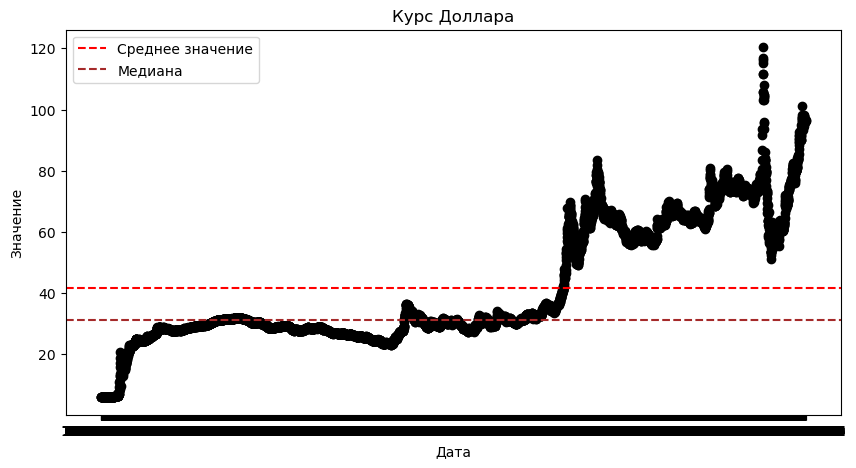

In [11]:
makePlot(df)

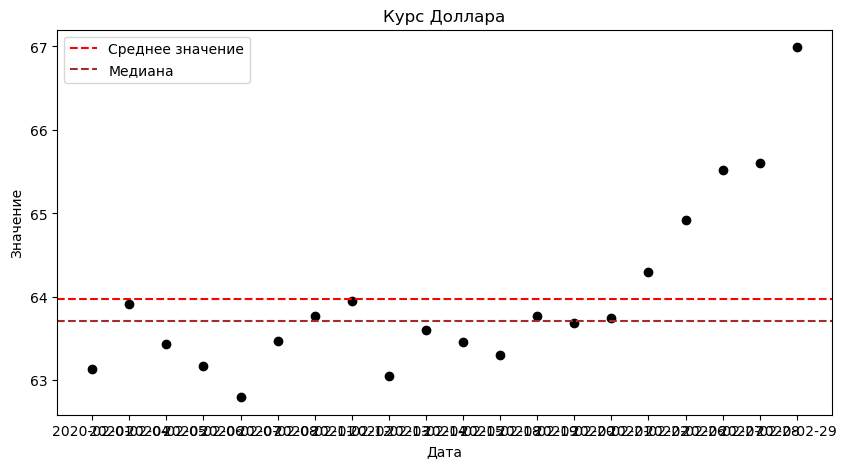

In [12]:
makePlotMonth(df, 2020, 2)

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.groupby([(df["Date"].dt.year), (df["Date"].dt.month)]).mean()

C:\Users\dimak\AppData\Local\Temp\ipykernel_1388\3007849515.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby([(df["Date"].dt.year), (df["Date"].dt.month)]).mean()


Value        Mean      Median
Date Date                                    
1992 7     141.556000  348.068706  109.772150
     8     168.162500  321.462206  136.378650
     9     220.488889  269.135818  188.705039
     10    353.777778  135.846929  321.993928
     11    426.250000   63.374706  394.466150
...               ...         ...         ...
2023 5      79.212595  410.412112   47.428745
     6      83.319333  406.305373   51.535483
     7      90.474048  399.150659   58.690198
     8      95.285348  394.339359   63.501498
     9      96.563660  393.061046   64.779810

[375 rows x 3 columns]